In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [157]:
training_dataset = pd.read_excel("/content/train.xlsx")

In [158]:
training_dataset.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,1,1,0,0,0,5849,0,0,360,2,1
1,2,1,1,1,0,4583,1508,128,360,1,0
2,3,1,1,0,1,3000,0,66,360,2,1
3,4,1,1,0,0,2583,2358,120,360,2,1
4,5,1,0,0,0,6000,0,141,360,2,1


In [159]:
training_dataset.shape

(437, 11)

In [160]:
#split dataset into x and y
x_train= training_dataset.iloc[:, :-1]  # Exclude the last column
x_train.head()


,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,1,1,0,0,0,5849,0,0,360,2
1,2,1,1,1,0,4583,1508,128,360,1
2,3,1,1,0,1,3000,0,66,360,2
3,4,1,1,0,0,2583,2358,120,360,2
4,5,1,0,0,0,6000,0,141,360,2


In [161]:
y_train = training_dataset.iloc[:, -1]
y_train.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [199]:
#split the x and y dataset imto the training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.25)

In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [201]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid',random_state = 1)
classifier.fit(x_train,y_train)

SVC(kernel='sigmoid', random_state=1)

In [202]:
y_pred = classifier.predict(x_test)

In [206]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 5  7]
 [ 1 15]]


0.7142857142857143

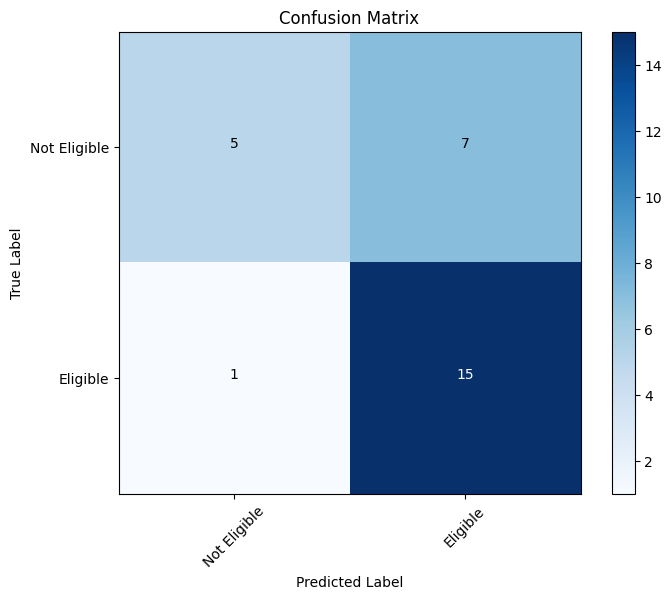

In [220]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add axis labels
classes = ['Not Eligible', 'Eligible']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the values of the confusion matrix
thresh = cm.max() / 2
for i, j in [(i, j) for i in range(len(classes)) for j in range(len(classes))]:
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [208]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.68      0.94      0.79        16

    accuracy                           0.71        28
   macro avg       0.76      0.68      0.67        28
weighted avg       0.75      0.71      0.69        28



In [212]:
predict_dataset = pd.read_excel("/content/pred.xlsx")

In [215]:
predict_dataset.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Unnamed: 11
0,0,1,1,0,0,0,5849,0,0,360,2,1
1,1,2,1,1,1,0,4583,1508,128,360,1,0
2,2,3,1,1,0,1,3000,0,66,360,2,1
3,3,4,1,1,0,0,2583,2358,120,360,2,1
4,4,5,1,0,0,0,6000,0,141,360,2,1


In [216]:
predict_dataset = predict_dataset.iloc[:, :-2]

In [219]:
predictions = classifier.predict(predict_dataset)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,